In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math as m

# Exercise 2 Part 1

The purpose of the reguliser term

$\frac{λ}{2} x^T x$ is to avoid overfitting or underfitting a model to our test set.

Essentially it acts as an overall generalisation to our fit.

# Exercise 2 Part 2



First we prepare the data

In [ ]:
#first we prepare our data

np.random.seed(1000)

#now to obtain A
A = np.random.randn(1000,10)

#now to obtain x_bar
x_bar = np.zeros((10,1))

for j in range(10):

    i = j+1

    if ((i)%2 == 1): #odd
      x_bar[j] = (-i + (i+1)) * np.random.random_sample() - (i+1) #(b - a) * random_sample() + a; for the  range [a,b]

    if (i%2 == 0): #even
      x_bar[j] = ((i+1) - i) * np.random.random_sample() + (i) #(b - a) * random_sample() + a; for the  range [a,b]


#now to obtain e (noise)
e = np.random.randn(1000,1)

#finally to obtain y
y = A @ x_bar + e

print("A = ", A)
print("x_bar = ", x_bar)
print("Y = ", y)

A =  [[-0.8044583   0.32093155 -0.02548288 ... -0.47998308  0.5950355
  -0.46466753]
 [ 0.66728131 -0.80611561 -1.19606983 ...  0.70569237  1.27179528
  -0.98674733]
 [-0.33483545 -0.0994817   0.4071921  ... -0.38314741 -0.82294096
   1.60008337]
 ...
 [ 0.4520184  -0.47786694 -1.9209351  ... -0.91576825  1.28648295
   1.96612251]
 [ 1.5847291   1.04574815  1.74030946 ... -0.95352929  0.74063574
   1.35391039]
 [-1.27767888  0.60413859 -0.81028802 ... -0.06434491  0.50570314
  -1.63094421]]
x_bar =  [[-1.06258705]
 [ 2.94307072]
 [-3.34150552]
 [ 4.58252615]
 [-5.75947573]
 [ 6.93512469]
 [-7.61893094]
 [ 8.16818187]
 [-9.2179964 ]
 [10.00022174]]
Y =  [[-3.84943546e+00]
 [-1.25706891e+01]
 [ 3.63121599e+01]
 [ 3.63405580e+01]
 [ 5.55093942e+00]
 [-7.82253463e+00]
 [-1.75872918e+01]
 [ 2.84011753e+01]
 [ 2.21735533e+01]
 [ 2.11419615e+01]
 [-3.01675507e+01]
 [ 2.02515788e+01]
 [ 6.33261119e+00]
 [-1.14486907e+00]
 [ 1.83388972e+01]
 [-1.53530539e+01]
 [-4.56793958e+01]
 [ 5.72204724e+0

Now the functions

In [ ]:
#first we will define the function, its gradient and the hessian

def func(A,Y,x,l):
    f = 0.5 * (np.linalg.norm(A @ x - y))**2 + 0.5*l* x.T @ x
    return f

def grad(A,Y,x, l):

    #for the OLS the gradient is equal to
    # A^T (Ax - Y)

    g = A.T @ A @ x - A.T @ Y + l*x

    return g

def hess(A,Y,x,l):

    #we define hessian as the double derivative of the function f
    #hence we simple take the derivative of the gradient
    #anyways the dimensions are independent of each other

    h = A.T @ A + l*np.identity(10, dtype = float)

    return h

# Newton's Method

In [ ]:
# Define tolerance level
def tolerance(p):
    return 10 ** (-p)

# Define the newton optimisation algorithm
def newton_opt(x, A, y, p, l):

        history = []
        TLevel = tolerance(p)
        count = 0

    # Perform the newton optimisation iterations

        while (np.linalg.norm(grad(A, y, x, l)) > TLevel):

            h = hess(A,y, x, l)
            hess_inv = np.linalg.inv(h)


            #initialise values for our a, gamma, and p
            a = 0.99
            gamma = 0.5
            p = 0.5

            d = -grad(A,y,x, l)

            #now a loop to conduct inexact line search
            while (func(A,y,x + a*d, l ) > (func(A,y,x, l) + gamma*a*(grad(A,y,x, l).T@d))):
                a = p*a


            # Update the parameters
            x = x + a * hess_inv @ d

            # Save the history of the parameters
            history.append((x, func(A,y, x, l), count))

            #count the iterations for convergence
            count = count+1


            #print(hess_inv)
            #print(a)
            #print(count)

            #print(x)
            #print(np.linalg.norm(grad(A, y, x)))
            #print()


        return x, func(A,y,x, l), count, history

In [ ]:
#first we define tolerance level
p=3
#tolerance has been lowered here as some iterations is take more than 15 minutes to compute
#keeping tolerance 10^-3 reduces time to 5 minutes per iteration

lamb_iter = []
lamb_x = []
lamb_fx = []

#now the start points
x0 = np.zeros((10,1))

lamb = [0.001, 0.01, 0.1, 1]

for i in range(len(lamb)):

    I = []
    x_val = []
    fx_val = []

    x_star, f_star, count, history = newton_opt(x0, A, y, p, lamb[i])

    print("For lambda value = ", lamb[i])
    print()
    print("x_star = ", x_star)
    print()
    print()

    for i in range(count-5000):
        I.append(history[i][2])
        x_val.append(m.log(np.linalg.norm(history[i][0] - x_star)))
        fx_val.append(m.log(abs(history[i][1] - f_star)))

    lamb_iter.append(I)
    lamb_x.append(x_val)
    lamb_fx.append(fx_val)

For lambda value =  0.001

x_star =  [[-1.04982177]
 [ 2.95189509]
 [-3.34297859]
 [ 4.60955451]
 [-5.71175695]
 [ 6.89876962]
 [-7.62878631]
 [ 8.1682038 ]
 [-9.22220362]
 [10.05668355]]




<ipython-input-10-0bfbb9dd5ac9>:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fx_val.append(m.log(abs(history[i][1] - f_star)))


For lambda value =  0.01

x_star =  [[-1.04981532]
 [ 2.95187515]
 [-3.3429499 ]
 [ 4.60950618]
 [-5.71171416]
 [ 6.8987132 ]
 [-7.6287238 ]
 [ 8.1681411 ]
 [-9.22213175]
 [10.05660304]]


For lambda value =  0.1

x_star =  [[-1.04975083]
 [ 2.95167581]
 [-3.34266298]
 [ 4.60902294]
 [-5.71128631]
 [ 6.89814909]
 [-7.62809876]
 [ 8.16751414]
 [-9.22141314]
 [10.05579793]]


For lambda value =  1

x_star =  [[-1.04910633]
 [ 2.94968373]
 [-3.33979653]
 [ 4.60419596]
 [-5.70701119]
 [ 6.89251306]
 [-7.621854  ]
 [ 8.16124981]
 [-9.21423321]
 [10.04775406]]




***NOTE:*** The y-axis is the log error function and the x-axis is meant to be the iterations

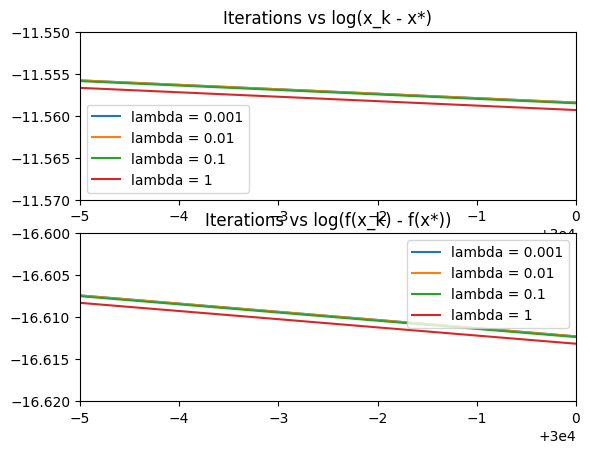

In [ ]:
#plotting

fig, (ax1, ax2) = plt.subplots(2)

ax1.plot(lamb_iter[0], lamb_x[0])
ax1.plot(lamb_iter[1], lamb_x[1])
ax1.plot(lamb_iter[2], lamb_x[2])
ax1.plot(lamb_iter[3], lamb_x[3])

ax1.legend(["lambda = 0.001", "lambda = 0.01", "lambda = 0.1", "lambda = 1"])
ax1.set_title('Iterations vs log(x_k - x*)')

ax1.set_xlim([29995, 30000])
ax1.set_ylim([-11.57,-11.55])

ax2.plot(lamb_iter[0], lamb_fx[0])
ax2.plot(lamb_iter[1], lamb_fx[1])
ax2.plot(lamb_iter[2], lamb_fx[2])
ax2.plot(lamb_iter[3], lamb_fx[3])

ax2.legend(["lambda = 0.001", "lambda = 0.01", "lambda = 0.1", "lambda = 1"])
ax2.set_title('Iterations vs log(f(x_k) - f(x*))')

ax2.set_xlim([29995, 30000])
ax2.set_ylim([-16.62, -16.6])

plt.show()

It is observed that for higher values of lambda we tend to have a slightly faster convergence.

For smaller values, we cannot observe much of a difference since there is a difference between them of smaller magnitudes.

# BFGS Method

In [ ]:
# Define tolerance level
def tolerance(p):
    return 10 ** (-p)


def L2_norm(g):
    return np.linalg.norm(g)


def BFGS_line_search(x, A, y, B0, p,l):

    g = grad(A,y,x,l)

    history = []
    TLevel = tolerance(p)
    count = 0

    while (L2_norm(g) > TLevel):

        #initialising line search parameters

        a0 = 0.99
        p = 0.5
        gamma = 0.5

        #initialising the direction parameter

        d =  - B0 @ g

        #now the line search loop

        while (func(A,y,x + a0*d,l) > func(A,y,x,l) + gamma*a0*g.T@ d): # Check the RHS once, whether it is supposed to be g.T @ d or d.T @ d
            a0 = a0 * p


        #initialising storage matrices
        x_old = np.zeros((10,1))
        x_new = np.zeros((10,1))

        #storing old values of x_k
        x_old = x

        #computing x_(k+1)
        x = x + a0*d

        #storing x_(k+1)
        x_new = x


        #Intitialising BFGS parameters
        s = np.zeros((10,1))
        z = np.zeros((10,1))
        I = np.identity(10)

        #giving values to these two their values
        s = x_new - x_old
        z = grad(A, y, x_new, l) - grad(A, y, x_old, l)

        #Updating B using s and y
        B0 = (I - (1/(s.T @ z))* s @ z.T) @ B0 @ (I - (1/(s.T @ z))* z @ s.T) + (1/(s.T @ z))* s @ s.T

        #now updating the gradient
        g = grad(A, y, x, l)

        # Save the history of the parameters
        history.append((x, func(A, y, x, l), count))

        #count the iterations for convergence
        count = count+1


    return x, func(A,y, x, l), count, history

In [ ]:
#first we define tolerance level
p=5

lamb_iter = []
lamb_x = []
lamb_fx = []

#now the start points
x0 = np.zeros((10,1))


#taking b0 as identity matrix
b0 = np.identity(10)

lamb = [0.001, 0.01, 0.1, 1]

for i in range(len(lamb)):

    I = []
    x_val = []
    fx_val = []

    x_star, f_star, count, history = BFGS_line_search(x0, A, y, b0, p, lamb[i])

    print("For lambda value = ", lamb[i])
    print()
    print("x_star = ", x_star)
    print()
    print()

    for i in range(count-4):
        I.append(history[i][2])
        x_val.append(m.log(np.linalg.norm(history[i][0] - x_star)))
        fx_val.append(m.log(abs(history[i][1] - f_star)))

    lamb_iter.append(I)
    lamb_x.append(x_val)
    lamb_fx.append(fx_val)

For lambda value =  0.001

x_star =  [[-1.04982182]
 [ 2.95189522]
 [-3.34297873]
 [ 4.6095547 ]
 [-5.71175719]
 [ 6.89876991]
 [-7.62878664]
 [ 8.16820415]
 [-9.22220401]
 [10.05668398]]


For lambda value =  0.01

x_star =  [[-1.04981537]
 [ 2.95187528]
 [-3.34295004]
 [ 4.60950637]
 [-5.71171441]
 [ 6.89871349]
 [-7.62872413]
 [ 8.16814145]
 [-9.22213214]
 [10.05660346]]


For lambda value =  0.1

x_star =  [[-1.04975087]
 [ 2.95167593]
 [-3.34266312]
 [ 4.60902313]
 [-5.71128655]
 [ 6.89814938]
 [-7.62809908]
 [ 8.16751449]
 [-9.22141353]
 [10.05579836]]


For lambda value =  1

x_star =  [[-1.04910637]
 [ 2.94968385]
 [-3.33979667]
 [ 4.60419616]
 [-5.70701144]
 [ 6.89251335]
 [-7.62185432]
 [ 8.16125016]
 [-9.2142336 ]
 [10.04775449]]




<ipython-input-8-ece9a58c2fd8>:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fx_val.append(m.log(abs(history[i][1] - f_star)))


***NOTE:*** The y-axis is the log error function and the x-axis is meant to be the iterations

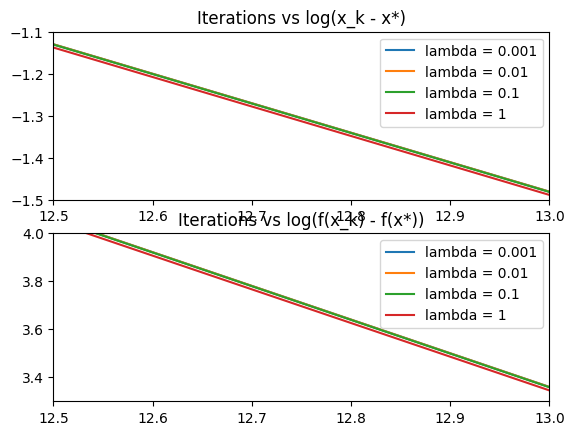

In [ ]:
#plotting

fig, (ax1, ax2) = plt.subplots(2)

ax1.plot(lamb_iter[0], lamb_x[0])
ax1.plot(lamb_iter[1], lamb_x[1])
ax1.plot(lamb_iter[2], lamb_x[2])
ax1.plot(lamb_iter[3], lamb_x[3])

ax1.legend(["lambda = 0.001", "lambda = 0.01", "lambda = 0.1", "lambda = 1"])
ax1.set_title('Iterations vs log(x_k - x*)')

ax1.set_xlim([12.5, 13])
ax1.set_ylim([-1.5,-1.1])

ax2.plot(lamb_iter[0], lamb_fx[0])
ax2.plot(lamb_iter[1], lamb_fx[1])
ax2.plot(lamb_iter[2], lamb_fx[2])
ax2.plot(lamb_iter[3], lamb_fx[3])

ax2.legend(["lambda = 0.001", "lambda = 0.01", "lambda = 0.1", "lambda = 1"])
ax2.set_title('Iterations vs log(f(x_k) - f(x*))')

ax2.set_xlim([12.5, 13])
ax2.set_ylim([3.3,4])

plt.show()

Here the distinction between the convergence rates of using different $λ$ values is nearly negligible.

This is mainly due to the efficiency of using BFGS algorithm.

# Exercise 2 Part 6

Clearly, BFGS is significantly faster than Newton's method.

Adding a regularisation term has a slow-down effect on the time taken for convergence for Newton's method.

Keep in mind that for my code, I changed the tolerance for Newton's method to $10^{-3}$ while the tolerance for BFGS remained $10^{-5}$.

Goes to show how much faster and computationally efficient BFGS method is, and it all boils down to the inverse of the hessian.